# KMeans Clustering

AUTHOR: LAWRENCE MBURA

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.shape

(150, 4)

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
clustering_data=df.iloc[:,[0,1,2,3]]
clustering_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Visualizing the dataset

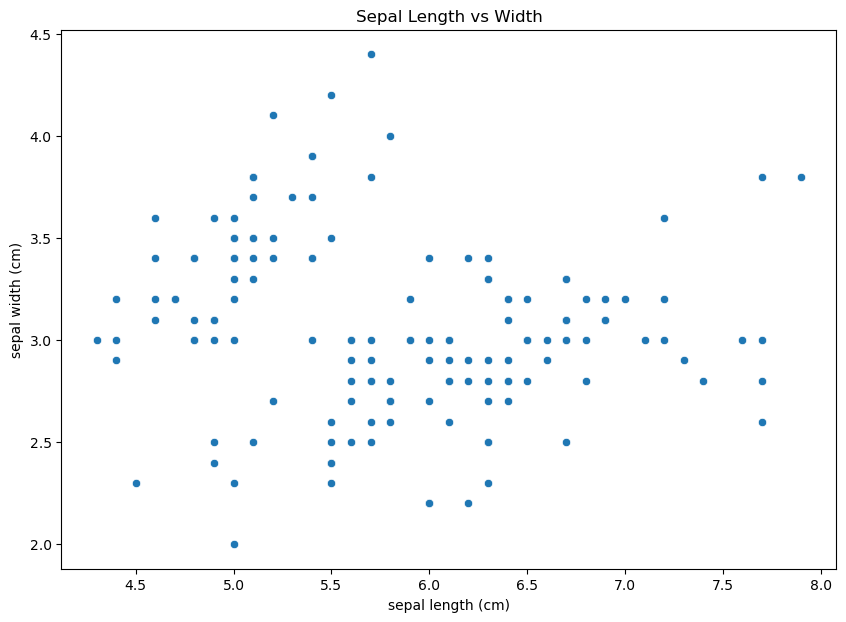

In [6]:
fig, ax=plt.subplots(figsize=(10,7))
ax=sns.scatterplot(x=df['sepal length (cm)'],y=df['sepal width (cm)'])
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
plt.title('Sepal Length vs Width')
plt.show()

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
    
np.array(wcss)

array([681.3706    , 152.34795176,  78.85144143,  57.22847321,
        46.44618205,  39.03998725,  34.40900974,  30.11238853,
        28.04383817,  26.51340821])

Using the Elbow method to get the maximum number of clusters

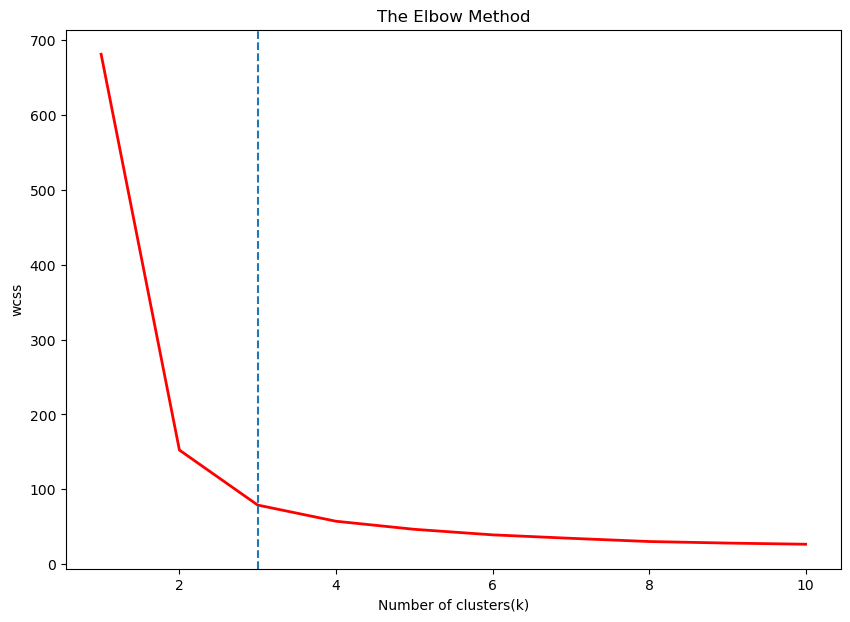

In [10]:
fig, ax=plt.subplots(figsize=(10,7))
ax=plt.plot(range(1,11), wcss, linewidth=2, color='red')
plt.axvline(x=3, ls='--')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss')
plt.title('The Elbow Method')
plt.show()

Using KMeans to fit and predict the cluster in the dataset

In [12]:
kms=KMeans(n_clusters=3, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=3)

In [13]:
clusters=clustering_data.copy()
clusters['Cluster_Prediction']=kms.fit_predict(clustering_data)
clusters.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [14]:
kms.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Visualizing the predicted cluster on the dataset

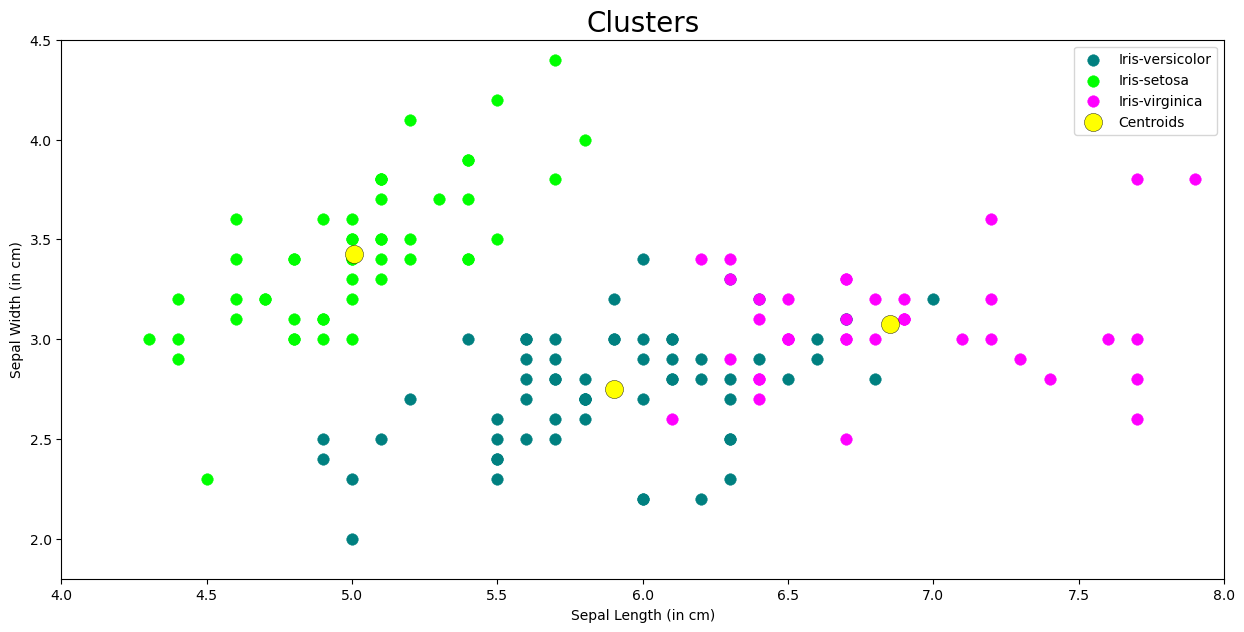

In [16]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal length (cm)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['sepal width (cm)'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal length (cm)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['sepal width (cm)'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal length (cm)'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['sepal width (cm)'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()
